In [ ]:
# stage 1 task

# first function dna to protein
TP53_seq= "CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGC"


def dna_to_protein(dna_sequence):
    codon_table = { 'ATA':'Isoleucine', 'ATC':'Isoleucine', 'ATT':'Isoleucine', 'ATG':'Methionine',
        'ACA':'Threonine', 'ACC':'Threonine', 'ACG':'Threonine', 'ACT':'Threonine',
        'AAC':'Asparagine', 'AAT':'Asparagine', 'AAA':'Lysine', 'AAG':'Lysine',
        'AGC':'Serine', 'AGT':'Serine', 'AGA':'Arginine', 'AGG':'Arginine',
        'CTA':'Leucine', 'CTC':'Leucine', 'CTG':'Leucine', 'CTT':'Leucine',
        'CCA':'Proline', 'CCC':'Proline', 'CCG':'Proline', 'CCT':'Proline',
        'CAC':'Histidine', 'CAT':'Histidine', 'CAA':'Glutamine', 'CAG':'Glutamine',
        'CGA':'Arginine', 'CGC':'Arginine', 'CGG':'Arginine', 'CGT':'Arginine',
        'GTA':'Valine', 'GTC':'Valine', 'GTG':'Valine', 'GTT':'Valine',
        'GCA':'Alanine', 'GCC':'Alanine', 'GCG':'Alanine', 'GCT':'Alanine',
        'GAC':'Aspartic acid', 'GAT':'Aspartic acid', 'GAA':'Glutamic acid', 'GAG':'Glutamic acid',
        'GGA':'Glycine', 'GGC':'Glycine', 'GGG':'Glycine', 'GGT':'Glycine',
        'TCA':'Serine', 'TCC':'Serine', 'TCG':'Serine', 'TCT':'Serine',
        'TTC':'Phenylalanine', 'TTT':'Phenylalanine', 'TTA':'Leucine', 'TTG':'Leucine',
        'TAC':'Tyrosine', 'TAT':'Tyrosine', 'TAA':'Stop', 'TAG':'Stop',
        'TGC':'Cysteine', 'TGT':'Cysteine', 'TGA':'Stop', 'TGG':'Tryptophan',    }
    protein_sequence = ""
    for i in range(0, len(dna_sequence), 3):
        codon = dna_sequence[i:i+3]
        protein_sequence += codon_table.get(codon, "") +"-"
    return protein_sequence.rstrip("-")
dna_to_protein(TP53_seq)



'Leucine-Lysine-Serine-Leucine-Glutamic acid-Proline-Proline-Serine-Arginine-Glutamic acid-Glutamine-Valine-Alanine-Alanine-Glycine-Leucine-Arginine-Glycine-Histidine-Phenylalanine-Alanine-Phenylalanine-Glycine'

   Time  Population  Lag_Phase  Exp_Phase  Curve_ID
0     0   10.000000          2         15         0
1     1   10.000000          2         15         0
2     2   10.000000          2         15         0
3     3   11.051709          2         15         0
4     4   12.214028          2         15         0


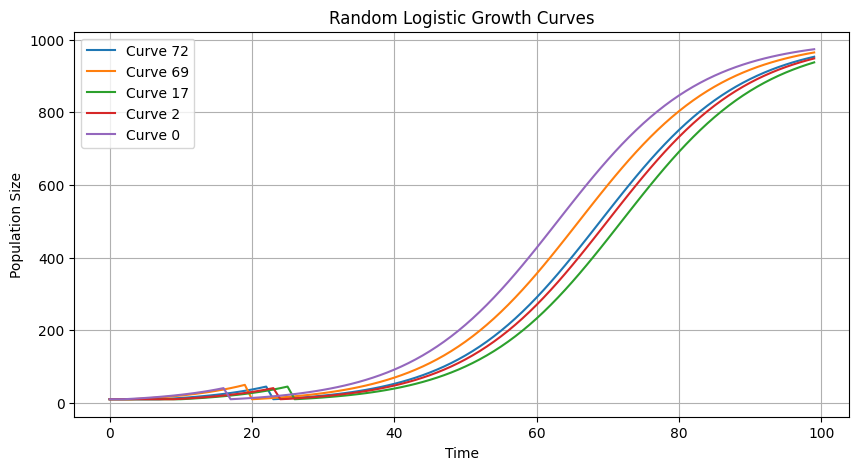

In [ ]:

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Second function, Logistic Growth Function
def logistic_growth_curve(N_initial, r, K, time_steps=100):
    """Simulates logistic growth with randomized lag and exponential phase durations."""
    lag_phase_length = random.randint(1, 10)  # Random lag phase length
    exponential_phase_length = random.randint(15, 20)  # Random exponential phase length

    population = []

    for t in range(time_steps):
        # Lag phase
        if t < lag_phase_length:
            N_t = N_initial
        # Exponential phase
        elif t < (lag_phase_length + exponential_phase_length):
            N_t = N_initial * np.exp(r * (t - lag_phase_length))
        # Logistic phase
        else:
            N_t = K / (1 + ((K - N_initial) / N_initial) * np.exp(-r * (t - lag_phase_length - exponential_phase_length)))

        population.append(N_t)

    return pd.DataFrame({"Time": range(time_steps), "Population": population,
                         "Lag_Phase": [lag_phase_length] * time_steps,
                         "Exp_Phase": [exponential_phase_length] * time_steps})

# Function to Generate Multiple Growth Curves
def generate_growth_curves(num_curves=100, time_steps=100):
    """Generates multiple logistic growth curves with different random lag and exponential phases."""
    all_curves = []

    for i in range(num_curves):
        df = logistic_growth_curve(N_initial=10, r=0.1, K=1000, time_steps=time_steps)
        df["Curve_ID"] = i
        all_curves.append(df)

    return pd.concat(all_curves, ignore_index=True)

#  Now we can generate 100 growth curves without error
df_all_growth = generate_growth_curves()
print(df_all_growth.head())

# Plot a few random growth curves
plt.figure(figsize=(10,5))
for i in np.random.choice(df_all_growth["Curve_ID"].unique(), 5, replace=False):
    subset = df_all_growth[df_all_growth["Curve_ID"] == i]
    plt.plot(subset["Time"], subset["Population"], label=f"Curve {i}")

plt.xlabel("Time")
plt.ylabel("Population Size")
plt.title("Random Logistic Growth Curves")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# forth function for determining the time to reach 80% of the maximum growth; usually the carrying capacity
import numpy as np

def time_to_reach_80_percent(N_initial, r, K, lag_phase_length, exponential_phase_length, time_steps=200):
    """Finds the time at which the population reaches 80% of the carrying capacity."""
    threshold = 0.8 * K  # 80% of carrying capacity
    population = []

    for t in range(time_steps):
        # Lag phase
        if t < lag_phase_length:
            N_t = N_initial
        # Exponential phase
        elif t < (lag_phase_length + exponential_phase_length):
            N_t = N_initial * np.exp(r * (t - lag_phase_length))
        # Logistic phase
        else:
            N_t = K / (1 + ((K - N_initial) / N_initial) * np.exp(-r * (t - lag_phase_length - exponential_phase_length)))

        population.append(N_t)


        if N_t >= threshold:
            return t

    return None

time_reached = time_to_reach_80_percent(N_initial=10, r=0.1, K=1000, lag_phase_length=2, exponential_phase_length=15)
print(f"Time to reach 80% of carrying capacity: {time_reached} minutes")


Time to reach 80% of carrying capacity: 77 minutes


In [ ]:
# fifth function hamming distance.
def hamming_distance(str1, str2):
    """Calculates the Hamming distance between two strings, padding the shorter one if necessary."""
    max_length = max(len(str1), len(str2))


    str1 = str1.ljust(max_length)
    str2 = str2.ljust(max_length)

    # Counting the number of differing characters
    distance = sum(c1 != c2 for c1, c2 in zip(str1, str2))
    return distance


name1 = "Fatemah Alsolaiman"
name2 = "f_alsolaiman"

hamming_dist = hamming_distance(name1, name2)
print(f"Hamming distance between '{name1}' and '{name2}': {hamming_dist}")


# github link


Hamming distance between 'Fatemah Alsolaiman' and 'f_alsolaiman': 18


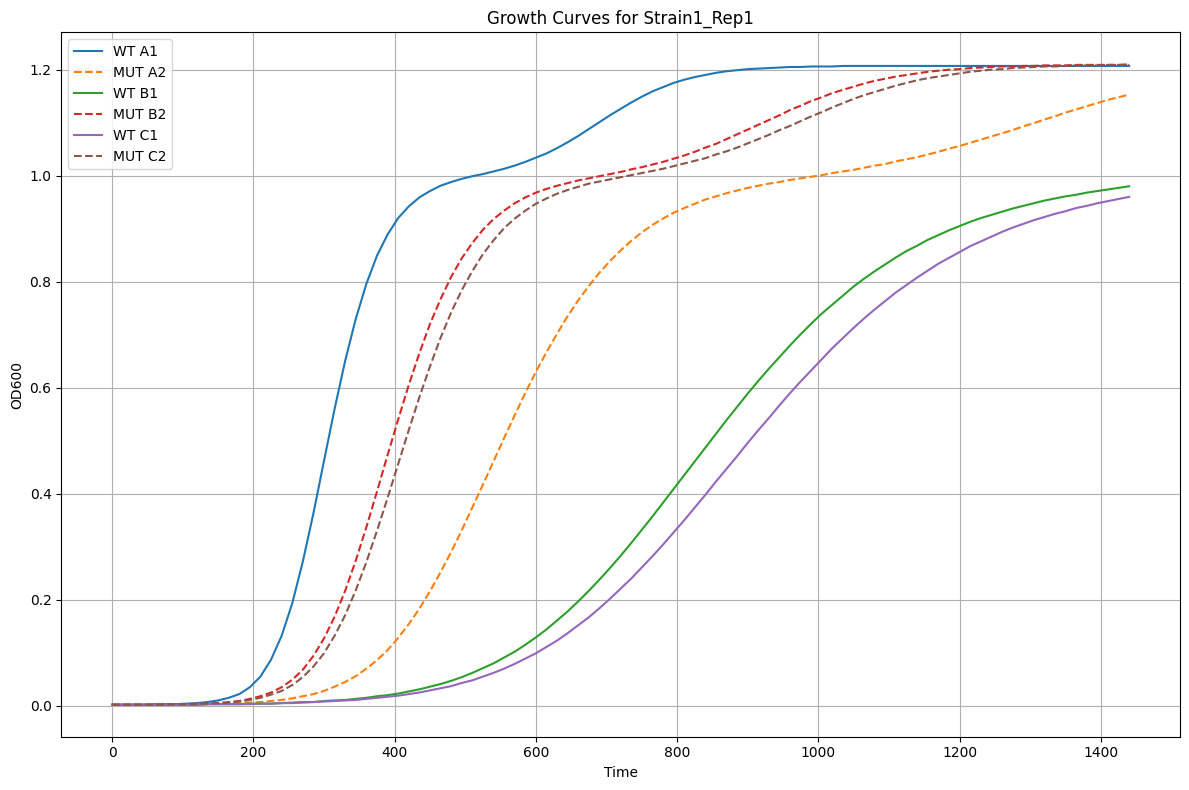

Time to reach carrying capacity for WT_A1: 95 minutes
Time to reach carrying capacity for MUT_A2: 95 minutes
Time to reach carrying capacity for WT_B1: 93 minutes
Time to reach carrying capacity for MUT_B2: 95 minutes
Time to reach carrying capacity for WT_C1: 93 minutes
Time to reach carrying capacity for MUT_C2: 95 minutes


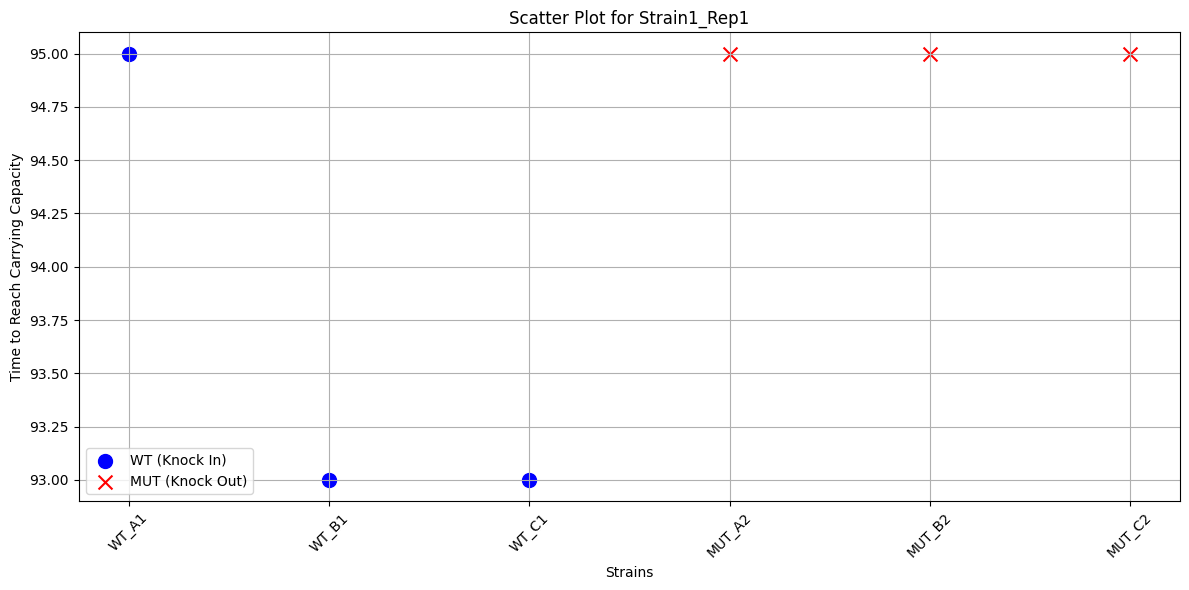

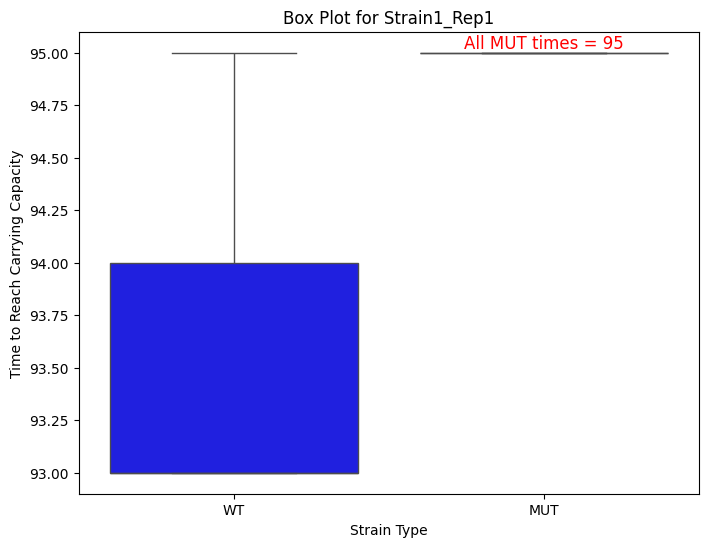

T-test results for Strain1_Rep1:
t-statistic: -4.638741920811847
p-value: 4.336082356822398e-06



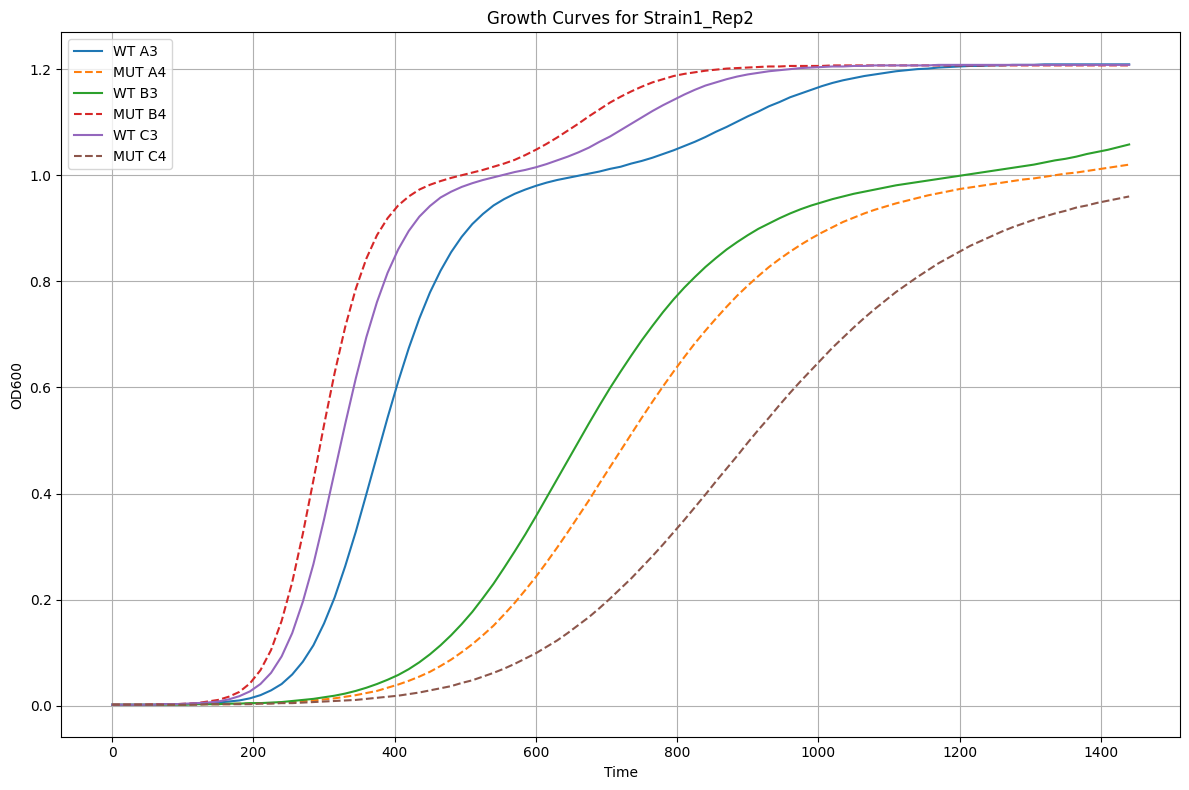

Time to reach carrying capacity for WT_A3: 95 minutes
Time to reach carrying capacity for MUT_A4: 94 minutes
Time to reach carrying capacity for WT_B3: 94 minutes
Time to reach carrying capacity for MUT_B4: 95 minutes
Time to reach carrying capacity for WT_C3: 95 minutes
Time to reach carrying capacity for MUT_C4: 93 minutes


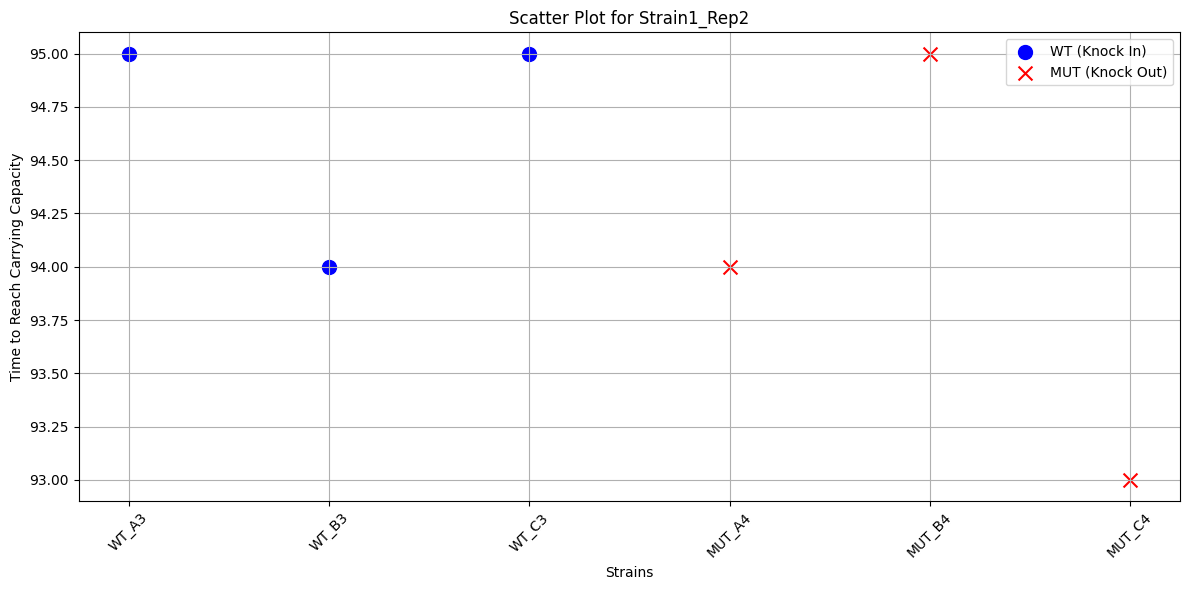

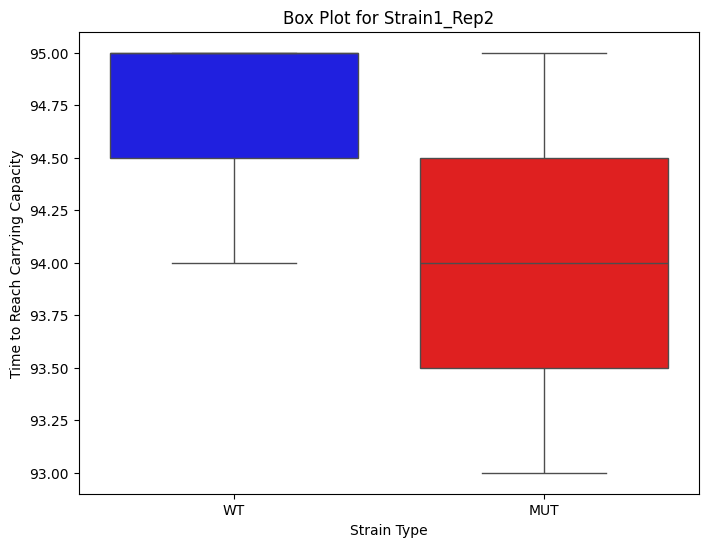

T-test results for Strain1_Rep2:
t-statistic: 3.961148213895282
p-value: 8.387417072728984e-05



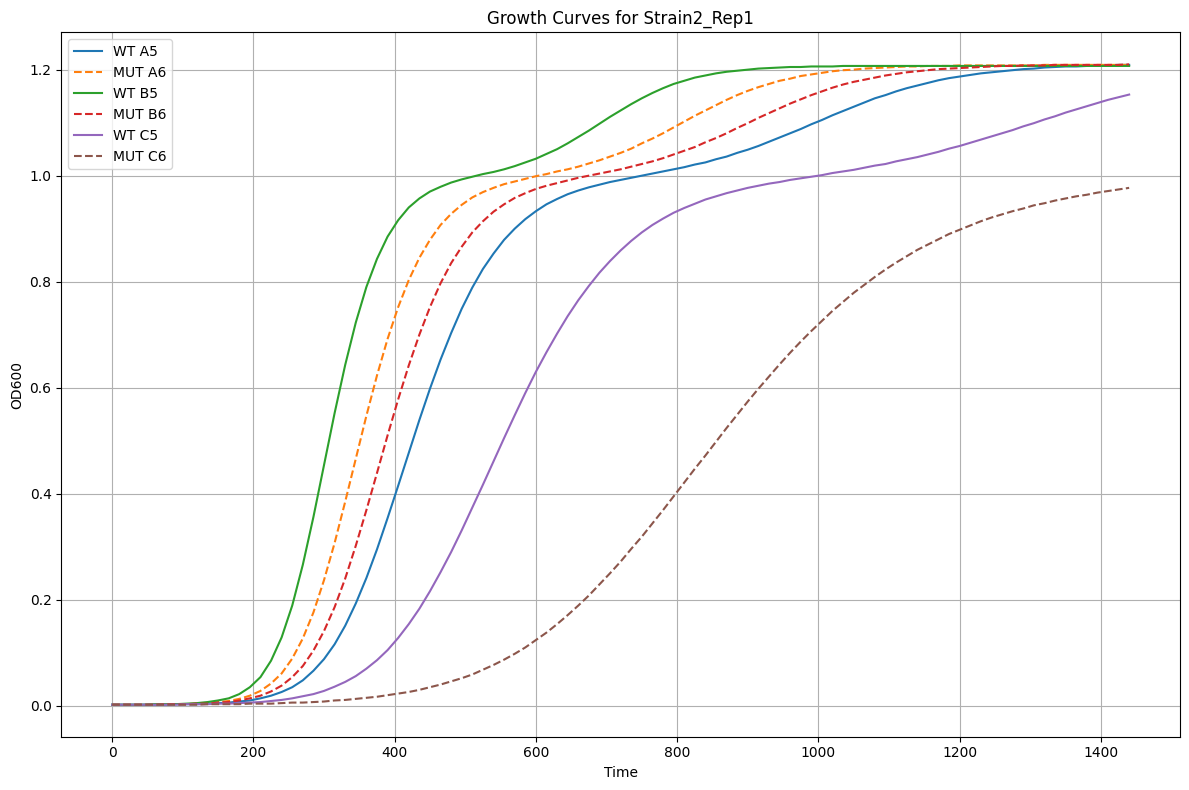

Time to reach carrying capacity for WT_A5: 95 minutes
Time to reach carrying capacity for MUT_A6: 95 minutes
Time to reach carrying capacity for WT_B5: 95 minutes
Time to reach carrying capacity for MUT_B6: 95 minutes
Time to reach carrying capacity for WT_C5: 95 minutes
Time to reach carrying capacity for MUT_C6: 93 minutes


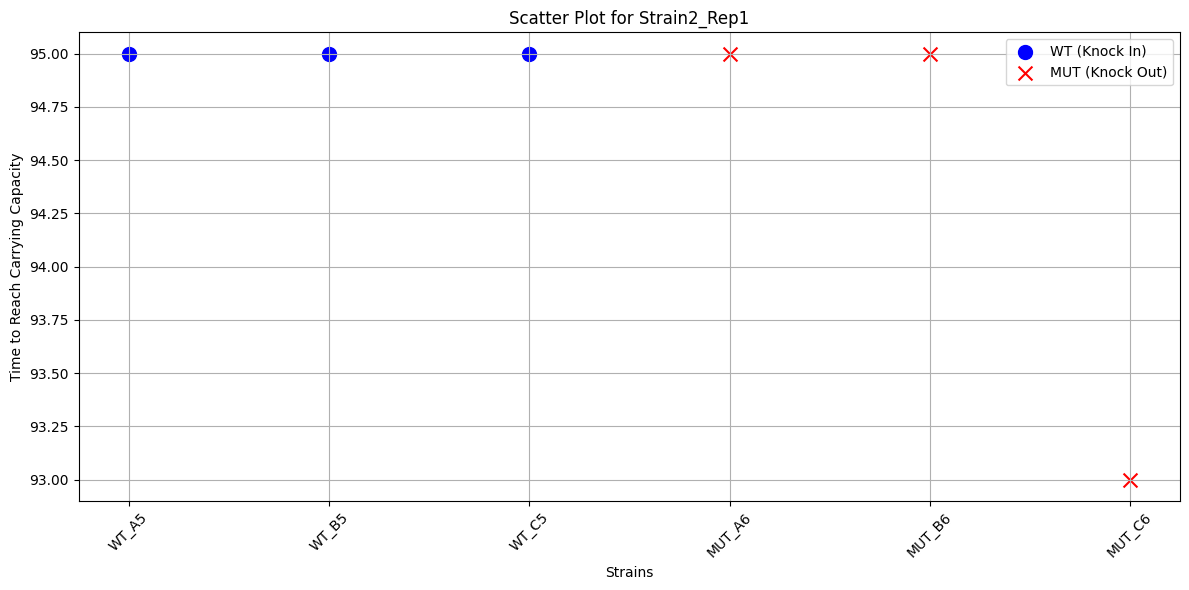

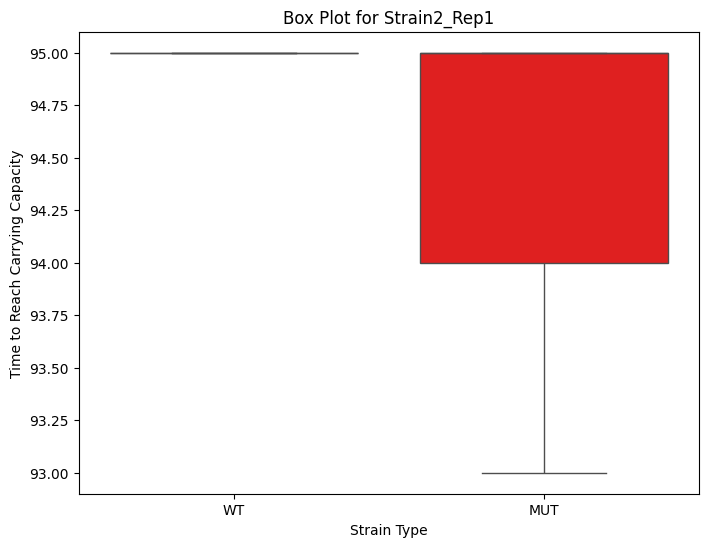

T-test results for Strain2_Rep1:
t-statistic: 2.0469155002144146
p-value: 0.041116505439487534



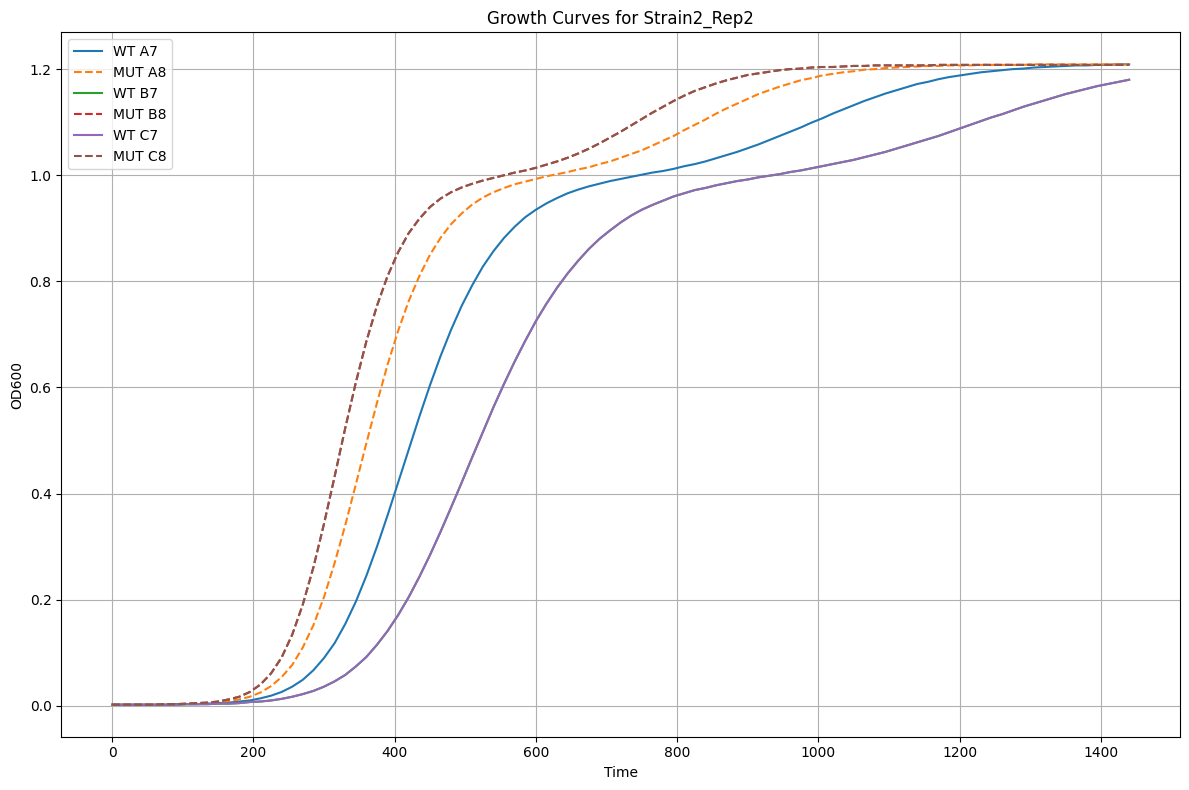

Time to reach carrying capacity for WT_A7: 95 minutes
Time to reach carrying capacity for MUT_A8: 95 minutes
Time to reach carrying capacity for WT_B7: 95 minutes
Time to reach carrying capacity for MUT_B8: 95 minutes
Time to reach carrying capacity for WT_C7: 95 minutes
Time to reach carrying capacity for MUT_C8: 95 minutes


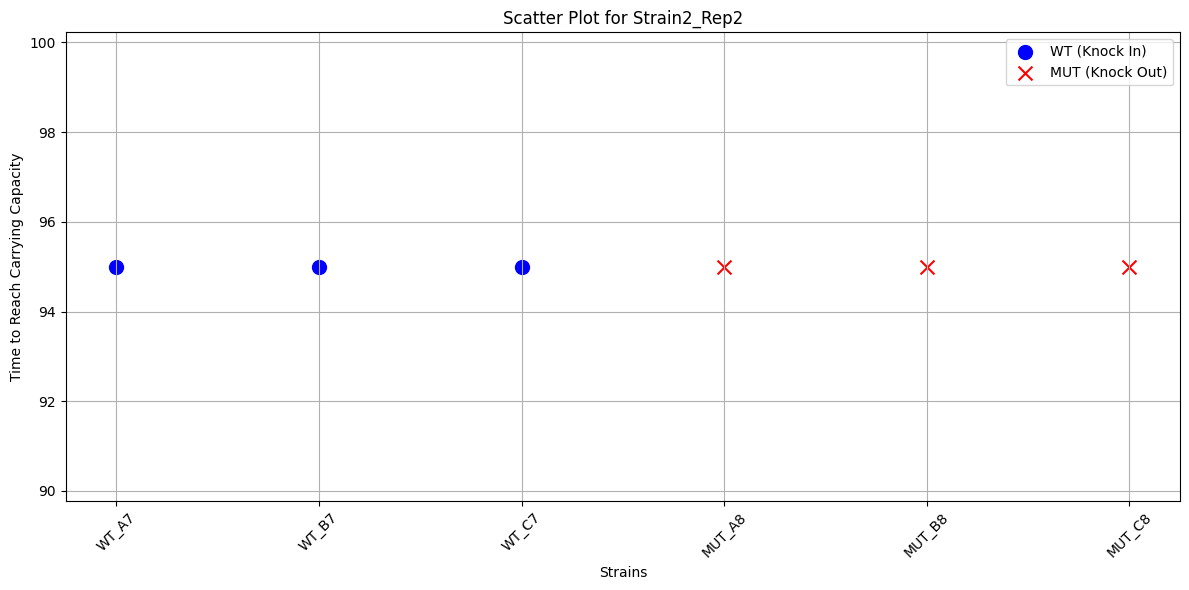

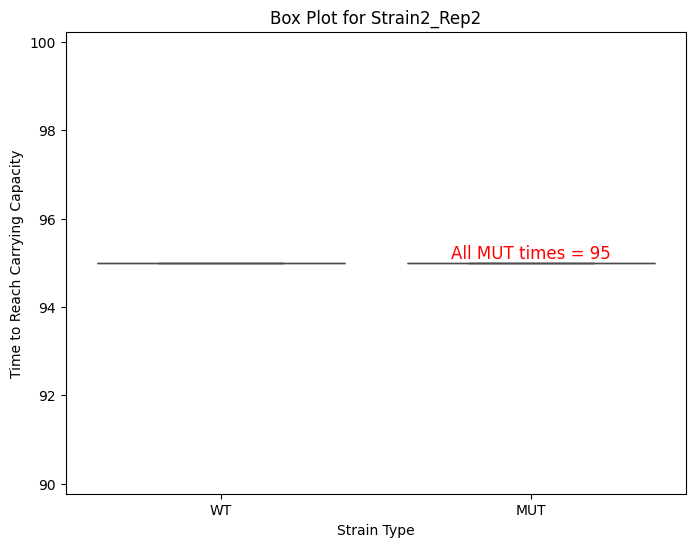

T-test results for Strain2_Rep2:
t-statistic: -4.188718534308386
p-value: 3.24204873048834e-05



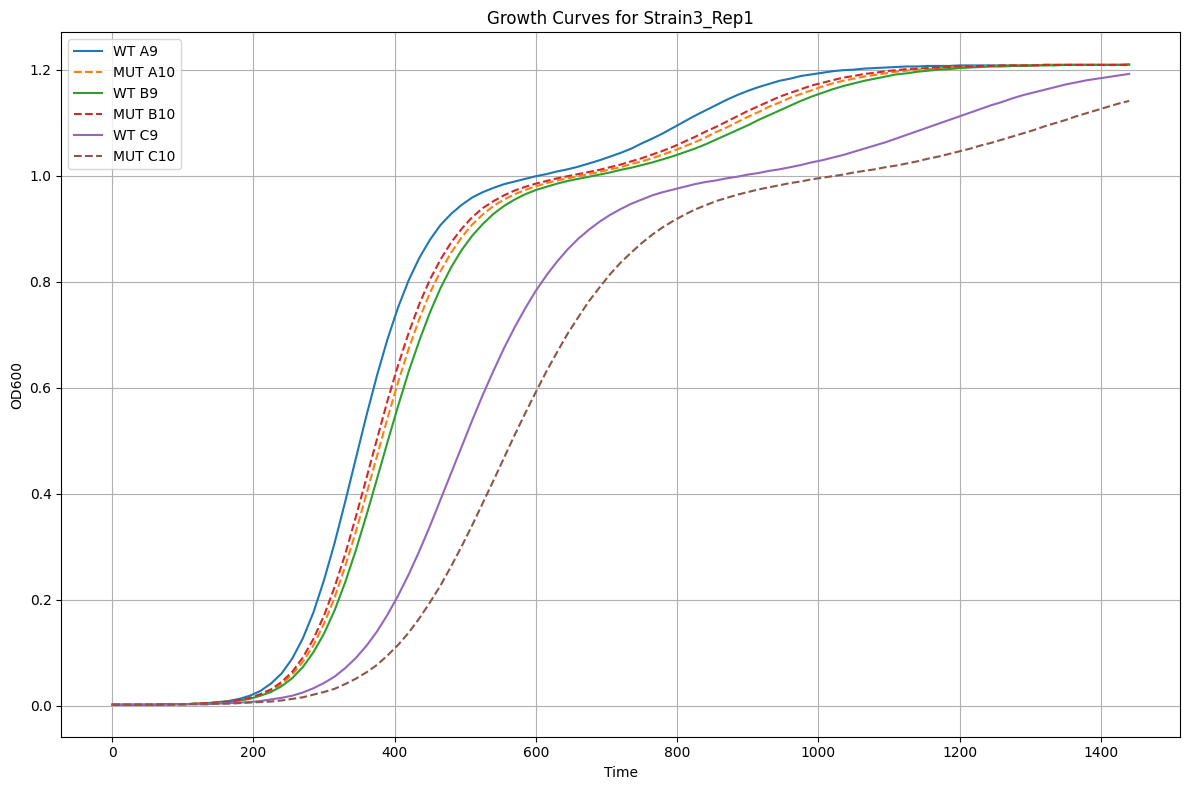

Time to reach carrying capacity for WT_A9: 95 minutes
Time to reach carrying capacity for MUT_A10: 95 minutes
Time to reach carrying capacity for WT_B9: 95 minutes
Time to reach carrying capacity for MUT_B10: 95 minutes
Time to reach carrying capacity for WT_C9: 95 minutes
Time to reach carrying capacity for MUT_C10: 95 minutes


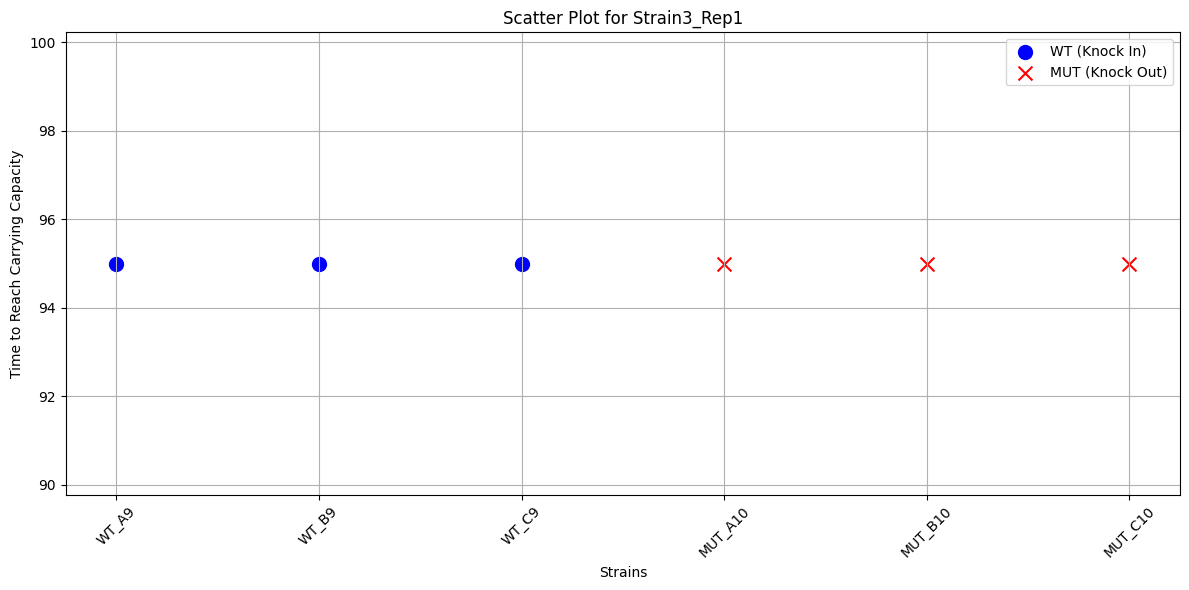

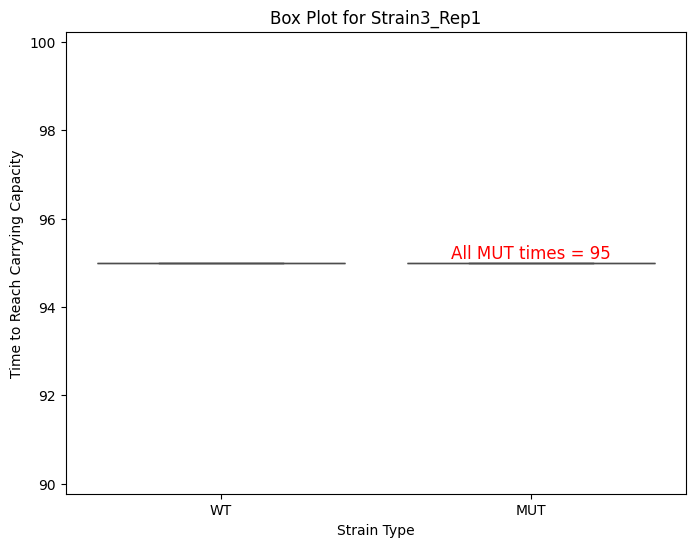

T-test results for Strain3_Rep1:
t-statistic: 0.7026377671151713
p-value: 0.482563422393129



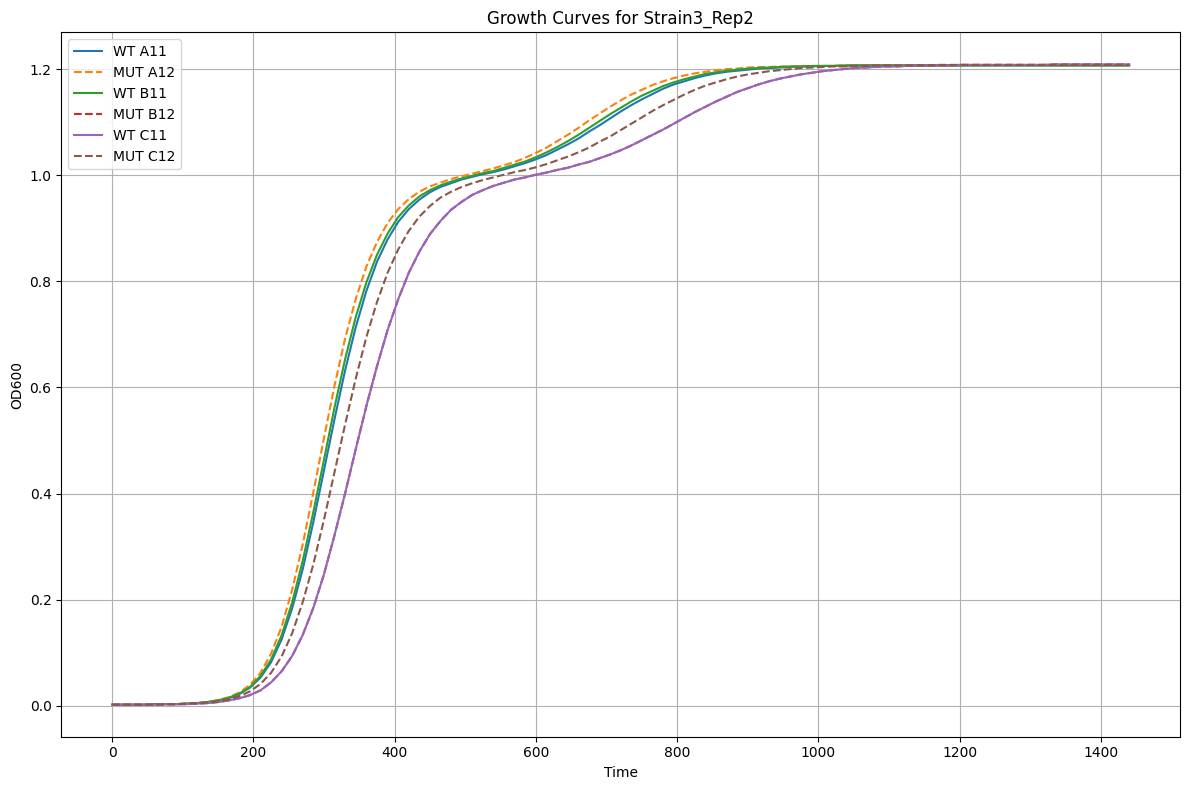

Time to reach carrying capacity for WT_A11: 95 minutes
Time to reach carrying capacity for MUT_A12: 95 minutes
Time to reach carrying capacity for WT_B11: 95 minutes
Time to reach carrying capacity for MUT_B12: 95 minutes
Time to reach carrying capacity for WT_C11: 95 minutes
Time to reach carrying capacity for MUT_C12: 95 minutes


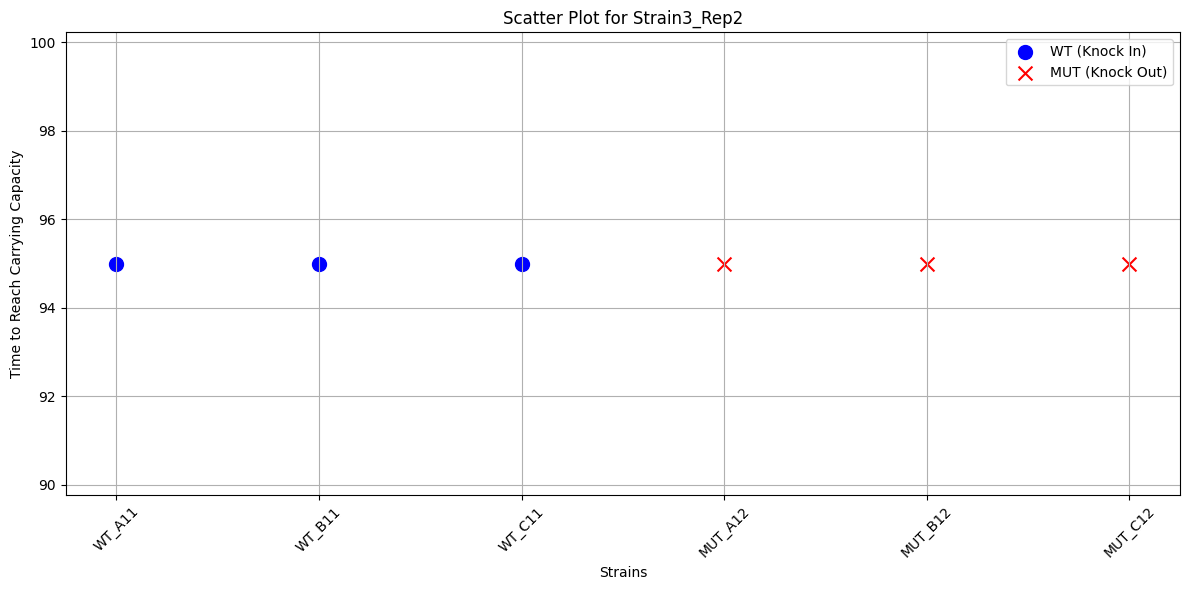

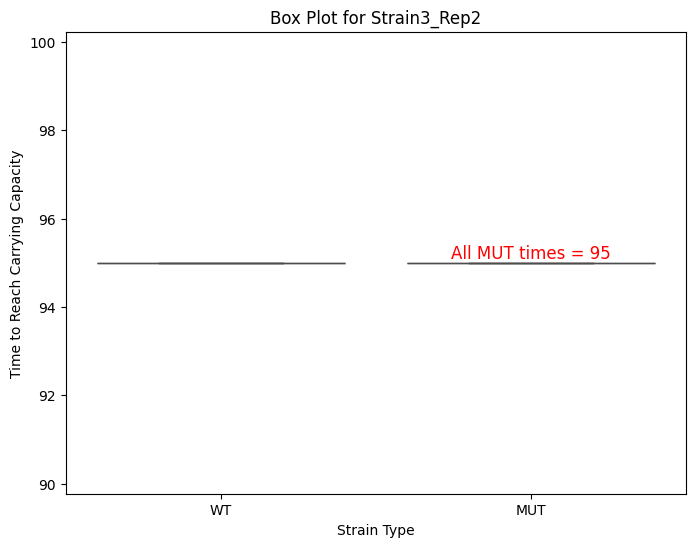

T-test results for Strain3_Rep2:
t-statistic: 0.09500005731902991
p-value: 0.9243475927160669



In [ ]:
#STAGE 2 (MICROBIOLOGY TASK)
#Task 2.1

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# dictionaries
Strain1_Rep1_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A1': [0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.004,  0.005,  0.007,  0.01,  0.015,  0.022,  0.035,  0.055,  0.087,  0.132,  0.193,  0.272,  0.363,  0.462,  0.56,  0.651,  0.73,  0.796,  0.849,  0.889,  0.92,  0.942,  0.959,  0.971,  0.981,  0.988,  0.994,  0.999,  1.003,  1.008,  1.013,  1.019,  1.026,  1.034,  1.042,  1.052,  1.063,  1.075,  1.088,  1.101,  1.114,  1.126,  1.138,  1.149,  1.159,  1.167,  1.175,  1.181,  1.186,  1.19,  1.194,  1.197,  1.199,  1.201,  1.202,  1.203,  1.204,  1.205,  1.205,  1.206,  1.206,  1.206,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207,  1.207],

    'MUT_A2': [0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.004,  0.004,  0.005,  0.006,  0.007,  0.009,  0.011,  0.014,  0.018,  0.022,  0.028,  0.036,  0.045,  0.056,  0.07,  0.086,  0.105,  0.128,  0.154,  0.183,  0.216,  0.252,  0.29,  0.331,  0.374,  0.417,  0.461,  0.505,  0.548,  0.59,  0.63,  0.667,  0.702,  0.735,  0.765,  0.792,  0.817,  0.839,  0.859,  0.877,  0.893,  0.907,  0.919,  0.93,  0.939,  0.947,  0.955,  0.961,  0.967,  0.972,  0.977,  0.981,  0.985,  0.988,  0.992,  0.995,  0.998,  1.001,  1.005,  1.008,  1.011,  1.015,  1.019,  1.022,  1.027,  1.031,  1.035,  1.04,  1.045,  1.051,  1.056,  1.062,  1.068,  1.074,  1.08,  1.086,  1.093,  1.099,  1.106,  1.112,  1.119,  1.125,  1.131,  1.137,  1.143,  1.148,  1.153],

    'WT_B1': [ 0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.003,  0.004,  0.004,  0.004,  0.005,  0.006,  0.007,  0.007,  0.009,  0.01,  0.011,  0.013,  0.015,  0.018,  0.02,  0.023,  0.027,  0.031,  0.036,  0.041,  0.047,  0.054,  0.062,  0.071,  0.08,  0.091,  0.102,  0.115,  0.129,  0.144,  0.161,  0.178,  0.197,  0.217,  0.238,  0.26,  0.283,  0.307,  0.332,  0.357,  0.383,  0.409,  0.435,  0.461,  0.487,  0.513,  0.539,  0.564,  0.589,  0.613,  0.636,  0.658,  0.68,  0.701,  0.721,  0.74,  0.757,  0.774,  0.791,  0.806,  0.82,  0.833,  0.846,  0.858,  0.868,  0.879,  0.888,  0.897,  0.905,  0.913,  0.92,  0.926,  0.932,  0.938,  0.943,  0.948,  0.953,  0.957,  0.961,  0.964,  0.968,  0.971,  0.974,  0.977,  0.98],

    'MUT_B2': [ 0.002,  0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.004,  0.004,  0.005,  0.007,  0.009,  0.013,  0.018,  0.025,  0.035,  0.049,  0.068,  0.094,  0.127,  0.168,  0.217,  0.274,  0.337,  0.404,  0.473,  0.54,  0.605,  0.665,  0.72,  0.767,  0.809,  0.844,  0.873,  0.898,  0.918,  0.934,  0.948,  0.959,  0.968,  0.975,  0.981,  0.986,  0.991,  0.995,  0.999,  1.003,  1.007,  1.012,  1.016,  1.021,  1.026,  1.032,  1.038,  1.045,  1.053,  1.06,  1.069,  1.078,  1.087,  1.096,  1.105,  1.114,  1.124,  1.132,  1.141,  1.148,  1.156,  1.162,  1.168,  1.174,  1.179,  1.183,  1.187,  1.19,  1.193,  1.196,  1.198,  1.2,  1.201,  1.203,  1.204,  1.205,  1.206,  1.206,  1.207,  1.207,  1.208,  1.208,  1.208,  1.209,  1.209,  1.209,  1.209,  1.209,  1.21],

    'WT_C1': [0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.003,  0.003,  0.003,  0.003,  0.003,  0.004,  0.004,  0.005,  0.005,  0.006,  0.007,  0.008,  0.009,  0.01,  0.011,  0.013,  0.015,  0.017,  0.019,  0.022,  0.025,  0.029,  0.033,  0.037,  0.043,  0.048,  0.055,  0.062,  0.07,  0.079,  0.089,  0.099,  0.111,  0.123,  0.137,  0.152,  0.167,  0.184,  0.202,  0.221,  0.24,  0.261,  0.282,  0.304,  0.327,  0.35,  0.374,  0.398,  0.423,  0.447,  0.471,  0.496,  0.52,  0.543,  0.567,  0.59,  0.612,  0.633,  0.654,  0.675,  0.694,  0.713,  0.731,  0.748,  0.764,  0.78,  0.794,  0.808,  0.821,  0.834,  0.845,  0.856,  0.867,  0.876,  0.885,  0.894,  0.902,  0.909,  0.916,  0.922,  0.928,  0.933,  0.939,  0.943,  0.948,  0.952,  0.956,  0.96],

    'MUT_C2': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.011, 0.015, 0.021, 0.028, 0.039, 0.054, 0.074, 0.099, 0.132, 0.171, 0.218, 0.271, 0.33, 0.392, 0.456, 0.52, 0.582, 0.64, 0.694, 0.742, 0.784, 0.82, 0.852, 0.878, 0.901, 0.919, 0.934, 0.947, 0.957, 0.966, 0.973, 0.979, 0.985, 0.989, 0.993, 0.997, 1.001, 1.005, 1.009, 1.013, 1.018, 1.023, 1.028, 1.033, 1.04, 1.046, 1.053, 1.061, 1.069, 1.077, 1.086, 1.094, 1.103, 1.112, 1.12, 1.129, 1.137, 1.145, 1.152, 1.158, 1.164, 1.17, 1.175, 1.18, 1.184, 1.187, 1.19, 1.193, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209]
}

Strain1_Rep2_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A3': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.014, 0.02, 0.029, 0.041, 0.059, 0.083, 0.114, 0.155, 0.204, 0.263, 0.328, 0.399, 0.471, 0.543, 0.611, 0.674, 0.73, 0.779, 0.82, 0.855, 0.884, 0.908, 0.927, 0.943, 0.955, 0.965, 0.973, 0.98, 0.986, 0.991, 0.995, 0.999, 1.003, 1.007, 1.012, 1.016, 1.022, 1.027, 1.033, 1.04, 1.047, 1.055, 1.063, 1.072, 1.082, 1.091, 1.101, 1.111, 1.12, 1.13, 1.138, 1.147, 1.154, 1.161, 1.168, 1.174, 1.179, 1.183, 1.187, 1.19, 1.193, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'MUT_A4': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.005, 0.006, 0.007, 0.009, 0.01, 0.012, 0.014, 0.017, 0.02, 0.024, 0.028, 0.034, 0.04, 0.047, 0.055, 0.064, 0.075, 0.087, 0.101, 0.116, 0.133, 0.151, 0.172, 0.194, 0.218, 0.243, 0.27, 0.298, 0.327, 0.357, 0.387, 0.419, 0.45, 0.481, 0.512, 0.543, 0.573, 0.602, 0.63, 0.657, 0.683, 0.707, 0.73, 0.752, 0.773, 0.792, 0.81, 0.827, 0.842, 0.856, 0.869, 0.881, 0.892, 0.902, 0.912, 0.92, 0.928, 0.935, 0.941, 0.947, 0.952, 0.957, 0.962, 0.966, 0.97, 0.974, 0.977, 0.98, 0.983, 0.986, 0.989, 0.992, 0.994, 0.997, 1, 1.003, 1.005, 1.008, 1.011, 1.014, 1.017, 1.02],

    'WT_B3': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.005, 0.006, 0.007, 0.009, 0.011, 0.013, 0.016, 0.019, 0.023, 0.028, 0.034, 0.041, 0.049, 0.058, 0.069, 0.082, 0.097, 0.114, 0.133, 0.154, 0.177, 0.203, 0.23, 0.26, 0.291, 0.323, 0.357, 0.392, 0.427, 0.462, 0.497, 0.532, 0.566, 0.599, 0.63, 0.66, 0.689, 0.716, 0.742, 0.766, 0.788, 0.808, 0.827, 0.844, 0.86, 0.874, 0.887, 0.899, 0.909, 0.919, 0.928, 0.936, 0.943, 0.949, 0.955, 0.96, 0.965, 0.969, 0.973, 0.977, 0.981, 0.984, 0.987, 0.99, 0.993, 0.996, 0.999, 1.002, 1.005, 1.008, 1.011, 1.014, 1.017, 1.02, 1.024, 1.028, 1.031, 1.035, 1.04, 1.044, 1.048, 1.053, 1.058],

    'MUT_B4': [0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.008, 0.011, 0.017, 0.026, 0.042, 0.067, 0.105, 0.16, 0.233, 0.324, 0.425, 0.529, 0.627, 0.714, 0.786, 0.843, 0.887, 0.919, 0.943, 0.96, 0.973, 0.982, 0.989, 0.995, 1, 1.005, 1.01, 1.016, 1.022, 1.029, 1.038, 1.048, 1.059, 1.071, 1.084, 1.097, 1.111, 1.124, 1.137, 1.148, 1.158, 1.167, 1.175, 1.181, 1.187, 1.191, 1.194, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'WT_C3': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.012, 0.018, 0.027, 0.041, 0.062, 0.093, 0.137, 0.196, 0.267, 0.351, 0.441, 0.531, 0.617, 0.695, 0.761, 0.816, 0.86, 0.895, 0.922, 0.942, 0.958, 0.969, 0.978, 0.985, 0.991, 0.996, 1.001, 1.006, 1.01, 1.015, 1.021, 1.028, 1.035, 1.043, 1.052, 1.063, 1.073, 1.085, 1.097, 1.109, 1.121, 1.132, 1.142, 1.152, 1.161, 1.169, 1.175, 1.181, 1.186, 1.19, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208],

    'MUT_C4': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.013, 0.015, 0.017, 0.019, 0.022, 0.025, 0.029, 0.033, 0.037, 0.043, 0.048, 0.055, 0.062, 0.07, 0.079, 0.089, 0.099, 0.111, 0.123, 0.137, 0.152, 0.167, 0.184, 0.202, 0.221, 0.24, 0.261, 0.282, 0.304, 0.327, 0.35, 0.374, 0.398, 0.423, 0.447, 0.471, 0.496, 0.52, 0.543, 0.567, 0.59, 0.612, 0.633, 0.654, 0.675, 0.694, 0.713, 0.731, 0.748, 0.764, 0.78, 0.794, 0.808, 0.821, 0.834, 0.845, 0.856, 0.867, 0.876, 0.885, 0.894, 0.902, 0.909, 0.916, 0.922, 0.928, 0.933, 0.939, 0.943, 0.948, 0.952, 0.956, 0.96]
}

Strain2_Rep1_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A5': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.014, 0.019, 0.026, 0.035, 0.048, 0.066, 0.088, 0.116, 0.151, 0.193, 0.241, 0.295, 0.354, 0.415, 0.477, 0.539, 0.598, 0.653, 0.703, 0.749, 0.789, 0.824, 0.853, 0.879, 0.9, 0.918, 0.933, 0.946, 0.956, 0.965, 0.972, 0.978, 0.983, 0.988, 0.992, 0.996, 1, 1.004, 1.008, 1.012, 1.016, 1.021, 1.025, 1.031, 1.036, 1.043, 1.049, 1.056, 1.064, 1.072, 1.08, 1.088, 1.097, 1.105, 1.114, 1.122, 1.13, 1.138, 1.146, 1.152, 1.159, 1.165, 1.17, 1.175, 1.18, 1.184, 1.187, 1.19, 1.193, 1.195, 1.197, 1.199, 1.201, 1.202, 1.204, 1.205, 1.206, 1.206, 1.207, 1.208, 1.208, 1.209, 1.209],

    'MUT_A6': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.009, 0.013, 0.019, 0.028, 0.042, 0.061, 0.089, 0.127, 0.176, 0.237, 0.307, 0.385, 0.466, 0.547, 0.623, 0.692, 0.752, 0.803, 0.845, 0.879, 0.907, 0.928, 0.945, 0.959, 0.969, 0.977, 0.984, 0.989, 0.994, 0.999, 1.003, 1.008, 1.012, 1.017, 1.023, 1.029, 1.036, 1.043, 1.051, 1.061, 1.07, 1.08, 1.091, 1.102, 1.113, 1.123, 1.133, 1.143, 1.152, 1.16, 1.167, 1.173, 1.179, 1.183, 1.188, 1.191, 1.194, 1.197, 1.199, 1.2, 1.202, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_B5': [0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.014, 0.022, 0.035, 0.054, 0.085, 0.129, 0.189, 0.266, 0.356, 0.454, 0.552, 0.643, 0.723, 0.79, 0.843, 0.885, 0.916, 0.94, 0.957, 0.97, 0.979, 0.987, 0.993, 0.998, 1.003, 1.007, 1.012, 1.018, 1.025, 1.032, 1.041, 1.05, 1.061, 1.073, 1.085, 1.098, 1.111, 1.123, 1.135, 1.146, 1.156, 1.165, 1.173, 1.179, 1.185, 1.189, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'MUT_B6': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.006, 0.007, 0.01, 0.014, 0.019, 0.027, 0.038, 0.054, 0.075, 0.104, 0.141, 0.186, 0.24, 0.302, 0.369, 0.439, 0.51, 0.578, 0.642, 0.7, 0.752, 0.797, 0.835, 0.866, 0.893, 0.914, 0.932, 0.946, 0.958, 0.967, 0.975, 0.981, 0.986, 0.991, 0.996, 1, 1.004, 1.008, 1.012, 1.017, 1.022, 1.027, 1.033, 1.04, 1.047, 1.054, 1.063, 1.071, 1.08, 1.09, 1.099, 1.109, 1.118, 1.127, 1.136, 1.144, 1.152, 1.159, 1.166, 1.172, 1.177, 1.181, 1.185, 1.189, 1.192, 1.195, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.21],

    'WT_C5': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.006, 0.007, 0.009, 0.011, 0.014, 0.018, 0.022, 0.028, 0.036, 0.045, 0.056, 0.07, 0.086, 0.105, 0.128, 0.154, 0.183, 0.216, 0.252, 0.29, 0.331, 0.374, 0.417, 0.461, 0.505, 0.548, 0.59, 0.63, 0.667, 0.702, 0.735, 0.765, 0.792, 0.817, 0.839, 0.859, 0.877, 0.893, 0.907, 0.919, 0.93, 0.939, 0.947, 0.955, 0.961, 0.967, 0.972, 0.977, 0.981, 0.985, 0.988, 0.992, 0.995, 0.998, 1.001, 1.005, 1.008, 1.011, 1.015, 1.019, 1.022, 1.027, 1.031, 1.035, 1.04, 1.045, 1.051, 1.056, 1.062, 1.068, 1.074, 1.08, 1.086, 1.093, 1.099, 1.106, 1.112, 1.119, 1.125, 1.131, 1.137, 1.143, 1.148, 1.153],

    'MUT_C6': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.004, 0.004, 0.004, 0.005, 0.006, 0.006, 0.007, 0.008, 0.01, 0.011, 0.013, 0.015, 0.017, 0.02, 0.023, 0.026, 0.03, 0.035, 0.04, 0.046, 0.052, 0.059, 0.068, 0.077, 0.087, 0.098, 0.11, 0.124, 0.138, 0.154, 0.171, 0.189, 0.208, 0.229, 0.25, 0.272, 0.296, 0.319, 0.344, 0.369, 0.395, 0.421, 0.447, 0.472, 0.498, 0.524, 0.549, 0.574, 0.598, 0.621, 0.644, 0.666, 0.687, 0.707, 0.726, 0.745, 0.762, 0.779, 0.794, 0.809, 0.823, 0.836, 0.848, 0.86, 0.87, 0.88, 0.89, 0.898, 0.906, 0.914, 0.921, 0.927, 0.933, 0.938, 0.944, 0.948, 0.953, 0.957, 0.961, 0.964, 0.968, 0.971, 0.974, 0.977]
}

Strain2_Rep2_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A7': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.014, 0.019, 0.026, 0.036, 0.049, 0.067, 0.09, 0.118, 0.154, 0.196, 0.245, 0.3, 0.359, 0.421, 0.483, 0.545, 0.604, 0.659, 0.709, 0.754, 0.793, 0.828, 0.857, 0.882, 0.903, 0.921, 0.935, 0.947, 0.957, 0.966, 0.973, 0.979, 0.984, 0.989, 0.993, 0.997, 1.001, 1.005, 1.008, 1.012, 1.017, 1.021, 1.026, 1.032, 1.038, 1.044, 1.051, 1.058, 1.066, 1.074, 1.082, 1.09, 1.099, 1.107, 1.116, 1.124, 1.132, 1.14, 1.147, 1.154, 1.16, 1.166, 1.172, 1.176, 1.181, 1.185, 1.188, 1.191, 1.194, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.207, 1.207, 1.208, 1.208, 1.209, 1.209],

    'MUT_A8': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.009, 0.012, 0.017, 0.025, 0.037, 0.054, 0.077, 0.11, 0.152, 0.205, 0.269, 0.34, 0.417, 0.495, 0.571, 0.643, 0.707, 0.763, 0.81, 0.85, 0.882, 0.908, 0.928, 0.945, 0.958, 0.968, 0.976, 0.983, 0.988, 0.993, 0.998, 1.002, 1.006, 1.011, 1.015, 1.021, 1.026, 1.033, 1.04, 1.047, 1.056, 1.065, 1.074, 1.085, 1.095, 1.105, 1.116, 1.126, 1.135, 1.144, 1.153, 1.16, 1.167, 1.173, 1.179, 1.183, 1.188, 1.191, 1.194, 1.196, 1.199, 1.2, 1.202, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_B7': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.007, 0.008, 0.01, 0.013, 0.017, 0.022, 0.028, 0.036, 0.046, 0.058, 0.074, 0.092, 0.115, 0.141, 0.171, 0.205, 0.243, 0.284, 0.328, 0.374, 0.421, 0.469, 0.516, 0.563, 0.607, 0.649, 0.688, 0.725, 0.758, 0.788, 0.815, 0.839, 0.861, 0.88, 0.896, 0.911, 0.924, 0.935, 0.944, 0.952, 0.96, 0.966, 0.972, 0.976, 0.981, 0.985, 0.989, 0.992, 0.996, 0.999, 1.002, 1.006, 1.009, 1.013, 1.017, 1.021, 1.025, 1.029, 1.034, 1.039, 1.044, 1.05, 1.056, 1.062, 1.068, 1.074, 1.081, 1.088, 1.095, 1.102, 1.109, 1.115, 1.122, 1.129, 1.135, 1.141, 1.147, 1.153, 1.158, 1.163, 1.168, 1.172, 1.176, 1.18],

    'MUT_B8': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.012, 0.017, 0.026, 0.04, 0.061, 0.091, 0.134, 0.191, 0.261, 0.343, 0.432, 0.523, 0.609, 0.687, 0.754, 0.81, 0.855, 0.891, 0.918, 0.94, 0.956, 0.968, 0.977, 0.984, 0.99, 0.995, 1, 1.005, 1.009, 1.014, 1.02, 1.026, 1.033, 1.041, 1.05, 1.06, 1.071, 1.082, 1.094, 1.106, 1.118, 1.129, 1.14, 1.15, 1.159, 1.166, 1.173, 1.179, 1.184, 1.189, 1.192, 1.195, 1.198, 1.2, 1.201, 1.203, 1.204, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208],

    'WT_C7': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.007, 0.008, 0.01, 0.013, 0.017, 0.022, 0.028, 0.036, 0.046, 0.058, 0.074, 0.092, 0.115, 0.141, 0.171, 0.205, 0.243, 0.284, 0.328, 0.374, 0.421, 0.469, 0.516, 0.563, 0.607, 0.649, 0.688, 0.725, 0.758, 0.788, 0.815, 0.839, 0.861, 0.88, 0.896, 0.911, 0.924, 0.935, 0.944, 0.952, 0.96, 0.966, 0.972, 0.976, 0.981, 0.985, 0.989, 0.992, 0.996, 0.999, 1.002, 1.006, 1.009, 1.013, 1.017, 1.021, 1.025, 1.029, 1.034, 1.039, 1.044, 1.05, 1.056, 1.062, 1.068, 1.074, 1.081, 1.088, 1.095, 1.102, 1.109, 1.115, 1.122, 1.129, 1.135, 1.141, 1.147, 1.153, 1.158, 1.163, 1.168, 1.172, 1.176, 1.18],

    'MUT_C8': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.012, 0.017, 0.026, 0.04, 0.061, 0.091, 0.134, 0.191, 0.261, 0.343, 0.432, 0.523, 0.609, 0.687, 0.754, 0.81, 0.855, 0.891, 0.918, 0.94, 0.956, 0.968, 0.977, 0.984, 0.99, 0.995, 1, 1.005, 1.009, 1.014, 1.02, 1.026, 1.033, 1.041, 1.05, 1.06, 1.071, 1.082, 1.094, 1.106, 1.118, 1.129, 1.14, 1.15, 1.159, 1.166, 1.173, 1.179, 1.184, 1.189, 1.192, 1.195, 1.198, 1.2, 1.201, 1.203, 1.204, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208]
}

Strain3_Rep1_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A9': [ 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.009, 0.013, 0.019, 0.028, 0.042, 0.061, 0.089, 0.127, 0.176, 0.237, 0.307, 0.385, 0.466, 0.547, 0.623, 0.692, 0.752, 0.803, 0.845, 0.879, 0.907, 0.928, 0.945, 0.959, 0.969, 0.977, 0.984, 0.989, 0.994, 0.999, 1.003, 1.008, 1.012, 1.017, 1.023, 1.029, 1.036, 1.043, 1.051, 1.061, 1.07, 1.08, 1.091, 1.102, 1.113, 1.123, 1.133, 1.143, 1.152, 1.16, 1.167, 1.173, 1.179, 1.183, 1.188, 1.191, 1.194, 1.197, 1.199, 1.2, 1.202, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'MUT_A10': [ 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.014, 0.02, 0.029, 0.041, 0.059, 0.083, 0.114, 0.155, 0.204, 0.263, 0.328, 0.399, 0.471, 0.543, 0.611, 0.674, 0.73, 0.779, 0.82, 0.855, 0.884, 0.908, 0.927, 0.943, 0.955, 0.965, 0.973, 0.98, 0.986, 0.991, 0.995, 0.999, 1.003, 1.007, 1.012, 1.016, 1.022, 1.027, 1.033, 1.04, 1.047, 1.055, 1.063, 1.072, 1.082, 1.091, 1.101, 1.111, 1.12, 1.13, 1.138, 1.147, 1.154, 1.161, 1.168, 1.174, 1.179, 1.183, 1.187, 1.19, 1.193, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_B9': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.006, 0.007, 0.01, 0.013, 0.019, 0.026, 0.037, 0.052, 0.073, 0.101, 0.136, 0.18, 0.233, 0.293, 0.359, 0.428, 0.498, 0.566, 0.631, 0.689, 0.742, 0.788, 0.827, 0.86, 0.887, 0.909, 0.928, 0.943, 0.955, 0.965, 0.973, 0.979, 0.985, 0.99, 0.994, 0.998, 1.002, 1.006, 1.011, 1.015, 1.02, 1.025, 1.031, 1.037, 1.044, 1.051, 1.059, 1.068, 1.077, 1.086, 1.095, 1.105, 1.114, 1.123, 1.132, 1.141, 1.149, 1.156, 1.163, 1.169, 1.174, 1.179, 1.183, 1.187, 1.191, 1.193, 1.196, 1.198, 1.2, 1.201, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.21],

    'MUT_B10': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.011, 0.015, 0.022, 0.031, 0.045, 0.064, 0.091, 0.126, 0.17, 0.224, 0.286, 0.356, 0.429, 0.503, 0.576, 0.643, 0.704, 0.758, 0.804, 0.842, 0.874, 0.9, 0.922, 0.939, 0.952, 0.963, 0.972, 0.979, 0.985, 0.99, 0.995, 0.999, 1.003, 1.007, 1.011, 1.016, 1.021, 1.027, 1.033, 1.04, 1.047, 1.055, 1.064, 1.073, 1.083, 1.092, 1.102, 1.112, 1.122, 1.131, 1.14, 1.149, 1.156, 1.163, 1.17, 1.175, 1.18, 1.185, 1.188, 1.192, 1.194, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.206, 1.206, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_C9': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.003, 0.004, 0.005, 0.006, 0.007, 0.009, 0.012, 0.015, 0.019, 0.025, 0.033, 0.043, 0.055, 0.071, 0.09, 0.113, 0.14, 0.172, 0.208, 0.248, 0.292, 0.339, 0.389, 0.439, 0.489, 0.539, 0.587, 0.632, 0.675, 0.714, 0.75, 0.783, 0.812, 0.838, 0.861, 0.881, 0.898, 0.913, 0.926, 0.937, 0.947, 0.955, 0.963, 0.969, 0.974, 0.979, 0.984, 0.988, 0.991, 0.995, 0.998, 1.002, 1.005, 1.009, 1.012, 1.016, 1.02, 1.025, 1.029, 1.034, 1.039, 1.045, 1.051, 1.057, 1.063, 1.07, 1.077, 1.084, 1.091, 1.098, 1.105, 1.112, 1.119, 1.126, 1.133, 1.139, 1.146, 1.152, 1.157, 1.162, 1.167, 1.172, 1.176, 1.18, 1.183, 1.186, 1.189, 1.192],

    'MUT_C10': [0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004, 0.005, 0.006, 0.007, 0.008, 0.01, 0.013, 0.016, 0.021, 0.026, 0.032, 0.041, 0.051, 0.063, 0.077, 0.095, 0.115, 0.138, 0.165, 0.195, 0.227, 0.263, 0.301, 0.341, 0.383, 0.425, 0.468, 0.511, 0.552, 0.592, 0.631, 0.667, 0.702, 0.733, 0.763, 0.789, 0.814, 0.836, 0.855, 0.873, 0.889, 0.903, 0.915, 0.926, 0.936, 0.944, 0.952, 0.958, 0.964, 0.969, 0.974, 0.978, 0.982, 0.986, 0.989, 0.993, 0.996, 0.999, 1.002, 1.006, 1.009, 1.012, 1.016, 1.019, 1.023, 1.027, 1.032, 1.036, 1.041, 1.046, 1.051, 1.057, 1.062, 1.068, 1.074, 1.08, 1.086, 1.093, 1.099, 1.105, 1.112, 1.118, 1.124, 1.13, 1.136, 1.141]
}


Strain3_Rep2_dic = {
    'Time': [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440],

    'WT_A11': [ 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.014, 0.022, 0.034, 0.053, 0.082, 0.125, 0.184, 0.258, 0.347, 0.444, 0.541, 0.633, 0.714, 0.782, 0.837, 0.879, 0.912, 0.936, 0.954, 0.968, 0.978, 0.985, 0.992, 0.997, 1.002, 1.006, 1.011, 1.017, 1.023, 1.03, 1.038, 1.048, 1.058, 1.069, 1.082, 1.094, 1.107, 1.12, 1.132, 1.143, 1.153, 1.163, 1.171, 1.177, 1.183, 1.188, 1.192, 1.195, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'MUT_A12': [0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.011, 0.016, 0.025, 0.039, 0.062, 0.098, 0.149, 0.219, 0.305, 0.403, 0.505, 0.604, 0.693, 0.767, 0.828, 0.874, 0.91, 0.936, 0.955, 0.969, 0.979, 0.986, 0.993, 0.998, 1.003, 1.008, 1.013, 1.019, 1.025, 1.033, 1.042, 1.052, 1.064, 1.076, 1.089, 1.103, 1.116, 1.129, 1.141, 1.152, 1.161, 1.17, 1.177, 1.183, 1.188, 1.192, 1.195, 1.198, 1.2, 1.201, 1.203, 1.204, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'WT_B11': [ 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.015, 0.023, 0.035, 0.056, 0.087, 0.133, 0.195, 0.274, 0.366, 0.464, 0.563, 0.654, 0.733, 0.798, 0.85, 0.89, 0.921, 0.943, 0.96, 0.972, 0.981, 0.988, 0.994, 0.999, 1.004, 1.008, 1.014, 1.02, 1.026, 1.034, 1.043, 1.053, 1.064, 1.076, 1.089, 1.102, 1.115, 1.127, 1.139, 1.15, 1.159, 1.168, 1.175, 1.181, 1.186, 1.191, 1.194, 1.197, 1.199, 1.201, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207],

    'MUT_B12': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.014, 0.02, 0.029, 0.044, 0.065, 0.094, 0.134, 0.185, 0.248, 0.322, 0.401, 0.484, 0.565, 0.64, 0.708, 0.766, 0.816, 0.856, 0.889, 0.914, 0.935, 0.95, 0.963, 0.972, 0.98, 0.986, 0.992, 0.996, 1.001, 1.005, 1.01, 1.014, 1.02, 1.025, 1.032, 1.039, 1.047, 1.056, 1.066, 1.076, 1.086, 1.097, 1.108, 1.119, 1.129, 1.139, 1.148, 1.157, 1.164, 1.171, 1.177, 1.182, 1.186, 1.19, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'WT_C11': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.005, 0.007, 0.01, 0.014, 0.02, 0.029, 0.044, 0.065, 0.094, 0.134, 0.185, 0.248, 0.322, 0.401, 0.484, 0.565, 0.64, 0.708, 0.766, 0.816, 0.856, 0.889, 0.914, 0.935, 0.95, 0.963, 0.972, 0.98, 0.986, 0.992, 0.996, 1.001, 1.005, 1.01, 1.014, 1.02, 1.025, 1.032, 1.039, 1.047, 1.056, 1.066, 1.076, 1.086, 1.097, 1.108, 1.119, 1.129, 1.139, 1.148, 1.157, 1.164, 1.171, 1.177, 1.182, 1.186, 1.19, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209, 1.209],

    'MUT_C12': [0.002, 0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.004, 0.005, 0.006, 0.008, 0.012, 0.018, 0.027, 0.041, 0.062, 0.093, 0.137, 0.196, 0.267, 0.351, 0.441, 0.531, 0.617, 0.695, 0.761, 0.816, 0.86, 0.895, 0.922, 0.942, 0.958, 0.969, 0.978, 0.985, 0.991, 0.996, 1.001, 1.006, 1.01, 1.015, 1.021, 1.028, 1.035, 1.043, 1.052, 1.063, 1.073, 1.085, 1.097, 1.109, 1.121, 1.132, 1.142, 1.152, 1.161, 1.169, 1.175, 1.181, 1.186, 1.19, 1.193, 1.196, 1.198, 1.2, 1.202, 1.203, 1.204, 1.205, 1.205, 1.206, 1.206, 1.207, 1.207, 1.207, 1.207, 1.207, 1.207, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208, 1.208]
}


# Function to calculate time to reach 80% of maximum growth
def time_to_reach_80_percent_max_growth(N_initial, r, max_growth, lag_phase_length, exponential_phase_length, time_steps=200):
    threshold = 0.8 * max_growth
    population = []

    for t in range(time_steps):
        if t < lag_phase_length:
            N_t = N_initial
        elif t < (lag_phase_length + exponential_phase_length):
            N_t = N_initial * np.exp(r * (t - lag_phase_length))
        else:
            N_t = max_growth / (1 + ((max_growth - N_initial) / N_initial) * np.exp(-r * (t - lag_phase_length - exponential_phase_length)))
        population.append(N_t)
        if N_t >= threshold:
            return t
    return None

def plot_scatter(wt_times, mut_times, title):
    strains_wt = list(wt_times.keys())
    strains_mut = list(mut_times.keys())
    times_wt = list(wt_times.values())
    times_mut = list(mut_times.values())

    x_wt = np.arange(len(strains_wt))
    x_mut = np.arange(len(strains_wt), len(strains_wt) + len(strains_mut))

    plt.figure(figsize=(12, 6))
    plt.scatter(x_wt, times_wt, color='blue', label='WT (Knock In)', s=100, marker='o')
    plt.scatter(x_mut, times_mut, color='red', label='MUT (Knock Out)', s=100, marker='x')
    all_strains = strains_wt + strains_mut
    plt.xticks(np.arange(len(all_strains)), all_strains, rotation=45)
    plt.xlabel('Strains')
    plt.ylabel('Time to Reach Carrying Capacity')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_boxplot(wt_times, mut_times, title):
    data = pd.DataFrame({
        'Time to Reach Carrying Capacity': wt_times + mut_times,
        'Strain Type': ['WT'] * len(wt_times) + ['MUT'] * len(mut_times)
    })

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Strain Type', y='Time to Reach Carrying Capacity', hue='Strain Type', data=data, palette={'WT': 'blue', 'MUT': 'red'}, legend=False)

    if len(set(mut_times)) == 1:
        plt.text(1, mut_times[0], f'All MUT times = {mut_times[0]}', ha='center', va='bottom', color='red', fontsize=12)
    plt.xlabel('Strain Type')
    plt.ylabel('Time to Reach Carrying Capacity')
    plt.title(title)
    plt.show()



def analyze_growth(data, N_initial, r, lag_phase_length, exponential_phase_length, title):
    df = pd.DataFrame(data)

    plt.figure(figsize=(12, 8))
    for column in df.columns[1:]:
        label = column.replace('_', ' ')
        linestyle = '-' if 'WT' in column else '--'
        plt.plot(df['Time'], df[column], label=label, linestyle=linestyle)
    plt.xlabel('Time')
    plt.ylabel('OD600')
    plt.title(f"Growth Curves for {title}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    max_od600 = df.drop(columns=['Time']).max()
    max_od600_dict = max_od600.to_dict()

    time_to_80_percent_dict = {
        organism: time_to_reach_80_percent_max_growth(
            N_initial=N_initial,
            r=r,
            max_growth=odmax,
            lag_phase_length=lag_phase_length,
            exponential_phase_length=exponential_phase_length
        )
        for organism, odmax in max_od600_dict.items()
    }

    for organism, time in time_to_80_percent_dict.items():
        print(f"Time to reach carrying capacity for {organism}: {time} minutes")

    wt_times = {k: v for k, v in time_to_80_percent_dict.items() if 'WT' in k}
    mut_times = {k: v for k, v in time_to_80_percent_dict.items() if 'MUT' in k}

    wt_times_list = list(wt_times.values())
    mut_times_list = list(mut_times.values())

    plot_scatter(wt_times, mut_times, title=f"Scatter Plot for {title}")
    plot_boxplot(wt_times_list, mut_times_list, title=f"Box Plot for {title}")



def perform_t_test(wt_data, mut_data):
    t_stat, p_value = stats.ttest_ind(wt_data, mut_data)
    return t_stat, p_value


data_list = [Strain1_Rep1_dic, Strain1_Rep2_dic, Strain2_Rep1_dic, Strain2_Rep2_dic, Strain3_Rep1_dic, Strain3_Rep2_dic]
titles = ['Strain1_Rep1', 'Strain1_Rep2', 'Strain2_Rep1', 'Strain2_Rep2', 'Strain3_Rep1', 'Strain3_Rep2']

N_initial = 0.002
r = 0.1
lag_phase_length = 2
exponential_phase_length = 15





for data, title in zip(data_list, titles):
    analyze_growth(data, N_initial, r, lag_phase_length, exponential_phase_length, title)

    df = pd.DataFrame(data)

    # Separate WT and MUT columns
    wt_columns = [col for col in df.columns if 'WT' in col]
    mut_columns = [col for col in df.columns if 'MUT' in col]

    # Extract WT and MUT data
    wt_data = df[wt_columns].values.flatten()
    mut_data = df[mut_columns].values.flatten()

    # Perform t-test
    t_stat, p_value = perform_t_test(wt_data, mut_data)

    # Print results
    print(f"T-test results for {title}:")
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}\n")



# OBSERVATIONS
# For strain1_rep1
  # there was a statistically significant increase in the time to reach the stationary phase in Mutant type compared to the Wild type
  # the box plot for the mutant group appeared as a line due to the fact that the time for each mutant type were the same
# For Strain1_rep2
  # there was a statistically significant increase in the time to reach the stationary phase in wild type compared to the mutant type
  # the box plot for the wild type appeared to show a higher time to reach the stationary phase in Mutant type compared to the Wild type though not statistically significant
# for strain2_rep1
  # there was a statistically significant increase in the time to reach the stationary phase in wild type compared to the mutant type
# For strain2_rep2
  #the was no statistically significant difference in the time to reach the stationary phase in Mutant type compared to the Wild type
# For strain2_rep2
  #the was no statistically significant difference in the time to reach the stationary phase in Mutant type compared to the Wild type
# For strain3_rep1
  #the was no statistically significant difference in the time to reach the stationary phase in Mutant type compared to the Wild type
# For strain3_rep2
  #the was no statistically significant difference in the time to reach the stationary phase in Mutant type compared to the Wild type


# github profile for team
# Ogunoye Blessing's Github page: https://github.com/to-ibukun
# Obakpolo Charis-Grace Github page: https://github.com/CeeGeeObas
# Funmilayo Ligali's Github page: https://github.com/Christianah001
# Fatemah Alsolaiman's Github page: https://github.com/92Faty







In [ ]:
1